In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data,
                             test_labels) = keras.datasets.imdb.load_data(
                                 num_words=NUM_WORDS)


def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [3]:
train_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5665 - accuracy: 0.7200 - binary_crossentropy: 0.5665 - val_loss: 0.4218 - val_accuracy: 0.8220 - val_binary_crossentropy: 0.4218 - 792ms/epoch - 16ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3626 - accuracy: 0.8500 - binary_crossentropy: 0.3626 - val_loss: 0.3443 - val_accuracy: 0.8540 - val_binary_crossentropy: 0.3443 - 227ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3198 - accuracy: 0.8674 - binary_crossentropy: 0.3198 - val_loss: 0.3328 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3328 - 237ms/epoch - 5ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3060 - accuracy: 0.8731 - binary_crossentropy: 0.3060 - val_loss: 0.3282 - val_accuracy: 0.8618 - val_binary_crossentropy: 0.3282 - 225ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.2975 - accuracy: 0.8765 - binary_crossentropy: 0.2975 - val_loss: 0.3286 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3286 - 234ms/epoch - 5ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2916 - accuracy: 0.8791 - binary

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6695 - accuracy: 0.6073 - binary_crossentropy: 0.6695 - val_loss: 0.6265 - val_accuracy: 0.6961 - val_binary_crossentropy: 0.6265 - 623ms/epoch - 13ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5625 - accuracy: 0.7674 - binary_crossentropy: 0.5625 - val_loss: 0.5094 - val_accuracy: 0.8206 - val_binary_crossentropy: 0.5094 - 189ms/epoch - 4ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4511 - accuracy: 0.8376 - binary_crossentropy: 0.4511 - val_loss: 0.4143 - val_accuracy: 0.8477 - val_binary_crossentropy: 0.4143 - 182ms/epoch - 4ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3726 - accuracy: 0.8590 - binary_crossentropy: 0.3726 - val_loss: 0.3637 - val_accuracy: 0.8547 - val_binary_crossentropy: 0.3637 - 180ms/epoch - 4ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3364 - accuracy: 0.8679 - binary_crossentropy: 0.3364 - val_loss: 0.3450 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3450 - 198ms/epoch - 4ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3199 - accuracy: 0.8722 - binary

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4385 - accuracy: 0.7884 - binary_crossentropy: 0.4385 - val_loss: 0.3289 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3289 - 1s/epoch - 21ms/step
Epoch 2/20
49/49 - 1s - loss: 0.2869 - accuracy: 0.8813 - binary_crossentropy: 0.2869 - val_loss: 0.3268 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3268 - 619ms/epoch - 13ms/step
Epoch 3/20
49/49 - 1s - loss: 0.2153 - accuracy: 0.9148 - binary_crossentropy: 0.2153 - val_loss: 0.3596 - val_accuracy: 0.8538 - val_binary_crossentropy: 0.3596 - 610ms/epoch - 12ms/step
Epoch 4/20
49/49 - 1s - loss: 0.1004 - accuracy: 0.9687 - binary_crossentropy: 0.1004 - val_loss: 0.4311 - val_accuracy: 0.8454 - val_binary_crossentropy: 0.4311 - 655ms/epoch - 13ms/step
Epoch 5/20
49/49 - 1s - loss: 0.0222 - accuracy: 0.9968 - binary_crossentropy: 0.0222 - val_loss: 0.5444 - val_accuracy: 0.8464 - val_binary_crossentropy: 0.5444 - 645ms/epoch - 13ms/step
Epoch 6/20
49/49 - 1s - loss: 0.0051 - accuracy: 0.9997 - binar

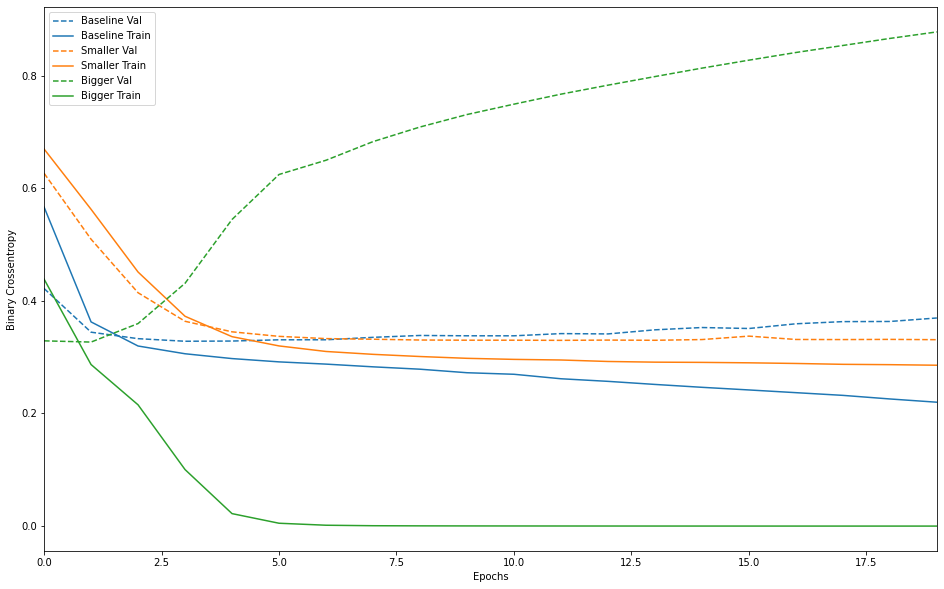

In [31]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch,
                       history.history['val_' + key],
                       '--',
                       label=name.title() + ' Val')
        plt.plot(history.epoch,
                 history.history[key],
                 color=val[0].get_color(),
                 label=name.title() + ' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['figure.facecolor'] = 'white'


plot_history([('baseline', baseline_history), ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16,
                       kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu',
                       input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16,
                       kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6428 - accuracy: 0.6954 - binary_crossentropy: 0.5993 - val_loss: 0.5022 - val_accuracy: 0.8076 - val_binary_crossentropy: 0.4604 - 726ms/epoch - 15ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4252 - accuracy: 0.8426 - binary_crossentropy: 0.3831 - val_loss: 0.3943 - val_accuracy: 0.8530 - val_binary_crossentropy: 0.3522 - 246ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3674 - accuracy: 0.8639 - binary_crossentropy: 0.3258 - val_loss: 0.3713 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3305 - 211ms/epoch - 4ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3506 - accuracy: 0.8729 - binary_crossentropy: 0.3105 - val_loss: 0.3663 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3271 - 192ms/epoch - 4ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3431 - accuracy: 0.8736 - binary_crossentropy: 0.3045 - val_loss: 0.3652 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.3275 - 183ms/epoch - 4ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3393 - accuracy: 0.8756 - binary

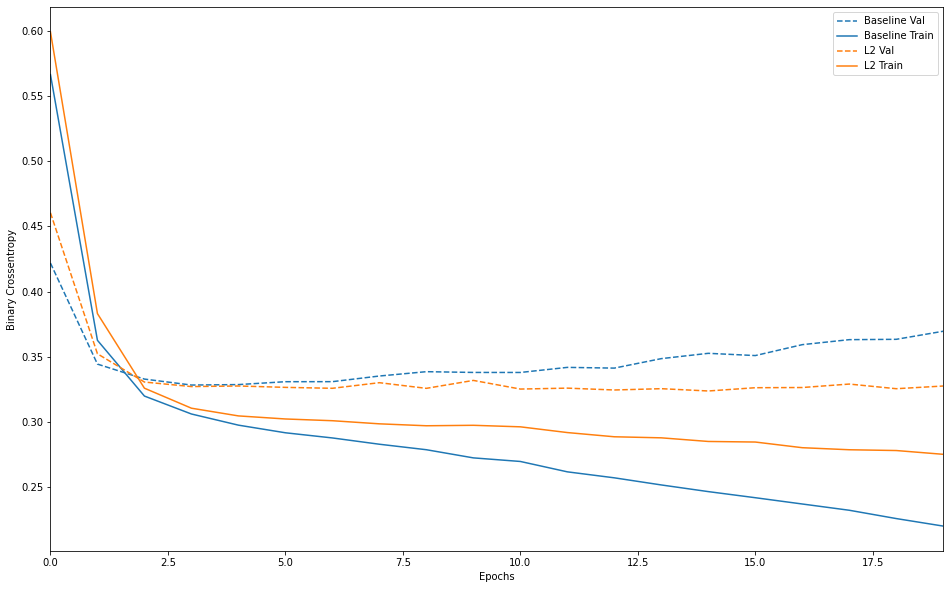

In [32]:
plot_history([('baseline', baseline_history), ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6719 - accuracy: 0.5745 - binary_crossentropy: 0.6719 - val_loss: 0.5868 - val_accuracy: 0.7503 - val_binary_crossentropy: 0.5868 - 751ms/epoch - 15ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5690 - accuracy: 0.7065 - binary_crossentropy: 0.5690 - val_loss: 0.4506 - val_accuracy: 0.8299 - val_binary_crossentropy: 0.4506 - 235ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4807 - accuracy: 0.7828 - binary_crossentropy: 0.4807 - val_loss: 0.3769 - val_accuracy: 0.8478 - val_binary_crossentropy: 0.3769 - 215ms/epoch - 4ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4281 - accuracy: 0.8196 - binary_crossentropy: 0.4281 - val_loss: 0.3429 - val_accuracy: 0.8554 - val_binary_crossentropy: 0.3429 - 206ms/epoch - 4ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4035 - accuracy: 0.8389 - binary_crossentropy: 0.4035 - val_loss: 0.3389 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3389 - 208ms/epoch - 4ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3788 - accuracy: 0.8498 - binary

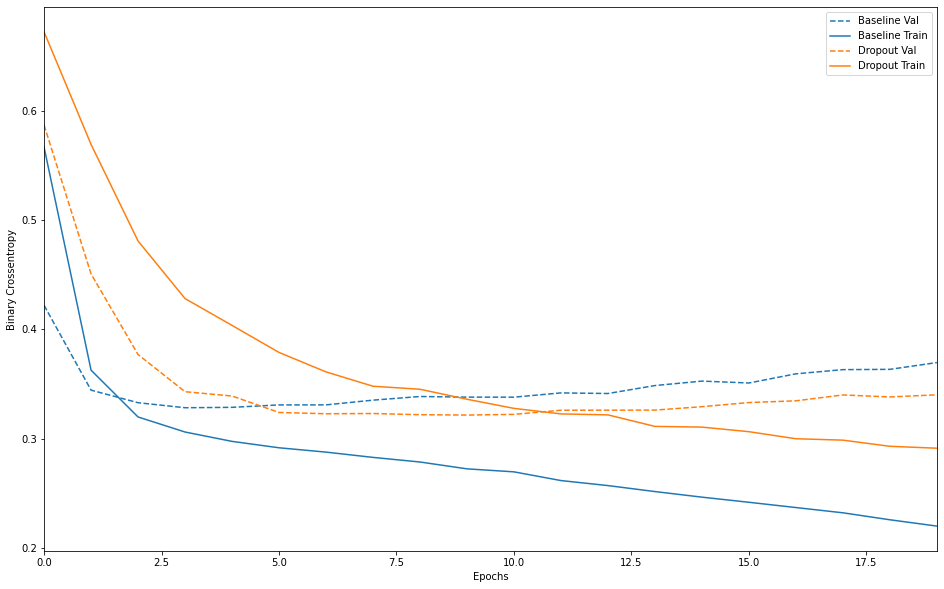

In [33]:
plot_history([('baseline', baseline_history), ('dropout', dpt_model_history)])